In [207]:
import pandas as pd

In [208]:
print(pd)

<module 'pandas' from 'C:\\Users\\Valued Customer\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\pandas\\__init__.py'>


In [209]:
df= pd.read_csv('employee_sample_data_with_issues.csv')

In [210]:
print(df.head())

      Name   Age    Salary Location Department
0   Nkechi  43.0   42448.0    Lagos      Sales
1  Ezekiel  48.0   96144.0     Kano      Admin
2   Gbenga  42.0   77612.0    Enugu      Admin
3     Kemi  35.0       NaN    Lagos    Finance
4    Tunde  23.0  139055.0     Kano  Marketing


In [211]:
print(df.isnull().sum())

Name          0
Age           5
Salary        5
Location      0
Department    0
dtype: int64


In [212]:
df_filled=df.fillna({'Salary':df['Salary'].median(),'Age':round(df['Age'].mean())})
df_filled['Age']= df_filled['Age'].astype(int)

In [213]:
print(df_filled .head())

      Name  Age    Salary Location Department
0   Nkechi   43   42448.0    Lagos      Sales
1  Ezekiel   48   96144.0     Kano      Admin
2   Gbenga   42   77612.0    Enugu      Admin
3     Kemi   35   77612.0    Lagos    Finance
4    Tunde   23  139055.0     Kano  Marketing


In [214]:
df_filled.isnull().sum()

Name          0
Age           0
Salary        0
Location      0
Department    0
dtype: int64

In [215]:
Q1=df_filled['Salary'].quantile(0.25) # 25th percentile
Q3=df_filled['Salary'].quantile(0.75)  #75th percentile
IQR= Q3-Q1   # Interquantile range

In [216]:
# DEFINING OUR OUTLIERS FOR LOWER AND UPPER BOUND
lower_bound=Q1 -1.5 *IQR
upper_bound =Q3+1.5 *IQR

#IDENTIFYING OUTLIERS

df_with_outliers=df_filled[(df_filled['Salary']<lower_bound )| (df_filled['Salary']>upper_bound)]
print('outliers')
df_with_outliers

outliers


,Name,Age,Salary,Location,Department
12,Queen,41,372730.0,Abuja,R&D
27,Opeyemi,38,372730.0,Enugu,IT


In [217]:
df_filled.to_csv("filled_employee_sample_data_with_issues.csv"), 'index=False'
print('file save successfully')

file save successfully


 ## Filtering and Removing

In [218]:
df_filled['Salary'].max()

np.float64(372730.0)

In [219]:
df_filled['Salary'].min()

np.float64(40732.0)

# Removing outliers

In [220]:
df_cleaned=df_filled[(df_filled['Salary']>=lower_bound) & (df_filled['Salary']<=upper_bound)]

In [221]:
df_cleaned.max()

Name                   Zuby
Age                      50
Salary             146551.0
Location      Port Harcourt
Department            Sales
dtype: object

In [222]:
df_cleaned.min()

Name           Adebayo
Age                 22
Salary         40732.0
Location      Abeokuta
Department       Admin
dtype: object

In [223]:
print(df_cleaned['Salary'].min())
print(df_cleaned['Salary'].max())

40732.0
146551.0


## VISUALIZING OUTLIERS

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns

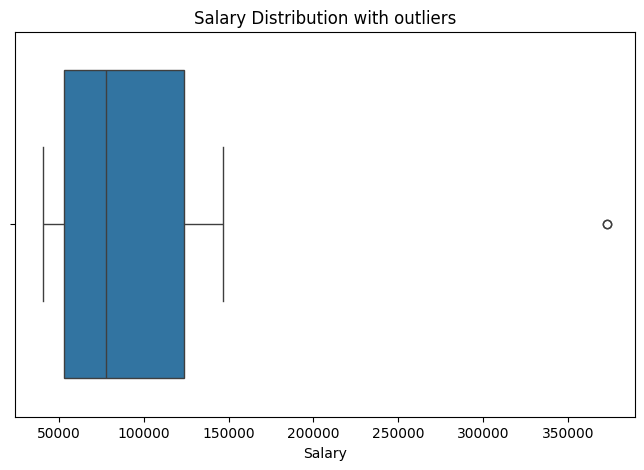

In [225]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["Salary"])
plt.title("Salary Distribution with outliers")
plt.xlabel("Salary")
plt.show()
            

### DATA VISUALIZATION WITH MATPLOTLIB AND SEABORN

In [226]:
import matplotlib.pyplot as plt
import seaborn as sns

In [227]:
#import the Dataset

df=sns.load_dataset('tips')
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [229]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [230]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [231]:
df['day'].count()

np.int64(244)

## SELECTING ROWS

In [232]:
df.iloc[:7]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2


 ## SELECTING ROWS ON CERTAIN CRITERIA

In [233]:
df.loc[df['day']=='Sun']

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3
187,30.46,2.00,Male,Yes,Sun,Dinner,5
188,18.15,3.50,Female,Yes,Sun,Dinner,3
189,23.10,4.00,Male,Yes,Sun,Dinner,3


In [234]:
df.loc[df['tip'] >9].count()

total_bill    1
tip           1
sex           1
smoker        1
day           1
time          1
size          1
dtype: int64

In [235]:
df.loc[df['sex'] =='Male'].count()

total_bill    157
tip           157
sex           157
smoker        157
day           157
time          157
size          157
dtype: int64

In [236]:
df_female=df.loc[df['sex']=='Female'].count()

In [237]:
df_female.head()

total_bill    87
tip           87
sex           87
smoker        87
day           87
dtype: int64

In [238]:
## selecting mulitple rows

df[['total_bill','tip','sex']]

,total_bill,tip,sex
0,16.99,1.01,Female
1,10.34,1.66,Male
2,21.01,3.50,Male
3,23.68,3.31,Male
4,24.59,3.61,Female
...,...,...,...
239,29.03,5.92,Male
240,27.18,2.00,Female
241,22.67,2.00,Male
242,17.82,1.75,Male


In [239]:
#selecting individual cell
df['total_bill']

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

# Running multiple Queries

In [240]:
df[(df['day']=='Sun') &(df['smoker']=='Yes') &(df['time'] =='Dinner')]

,total_bill,tip,sex,smoker,day,time,size
164,17.51,3.00,Female,Yes,Sun,Dinner,2
172,7.25,5.15,Male,Yes,Sun,Dinner,2
173,31.85,3.18,Male,Yes,Sun,Dinner,2
174,16.82,4.00,Male,Yes,Sun,Dinner,2
175,32.90,3.11,Male,Yes,Sun,Dinner,2
176,17.89,2.00,Male,Yes,Sun,Dinner,2
177,14.48,2.00,Male,Yes,Sun,Dinner,2
178,9.60,4.00,Female,Yes,Sun,Dinner,2
179,34.63,3.55,Male,Yes,Sun,Dinner,2
180,34.65,3.68,Male,Yes,Sun,Dinner,4


## Creating New column

In [241]:
df['tip_percentage']=(df['tip']/df['total_bill'])*100
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


#### How to delete a column

### df.drop('tip_percentage',axis=1,inplace=True)

# GROUPINT DATASETS

In [242]:
grouped=df.groupby('sex')

C:\Users\Valued Customer\AppData\Local\Temp\ipykernel_4292\2697739446.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped=df.groupby('sex')


In [243]:
grouped

In [244]:
print(grouped.head())

    total_bill   tip     sex smoker  day    time  size  tip_percentage
0        16.99  1.01  Female     No  Sun  Dinner     2        5.944673
1        10.34  1.66    Male     No  Sun  Dinner     3       16.054159
2        21.01  3.50    Male     No  Sun  Dinner     3       16.658734
3        23.68  3.31    Male     No  Sun  Dinner     2       13.978041
4        24.59  3.61  Female     No  Sun  Dinner     4       14.680765
5        25.29  4.71    Male     No  Sun  Dinner     4       18.623962
6         8.77  2.00    Male     No  Sun  Dinner     2       22.805017
11       35.26  5.00  Female     No  Sun  Dinner     4       14.180374
14       14.83  3.02  Female     No  Sun  Dinner     2       20.364127
16       10.33  1.67  Female     No  Sun  Dinner     3       16.166505


In [245]:
grouped.agg({'total_bill': 'mean','tip':'sum'})

,total_bill,tip
sex,,
Male,20.744076,485.07
Female,18.056897,246.51


# DATA VISUALIZATION

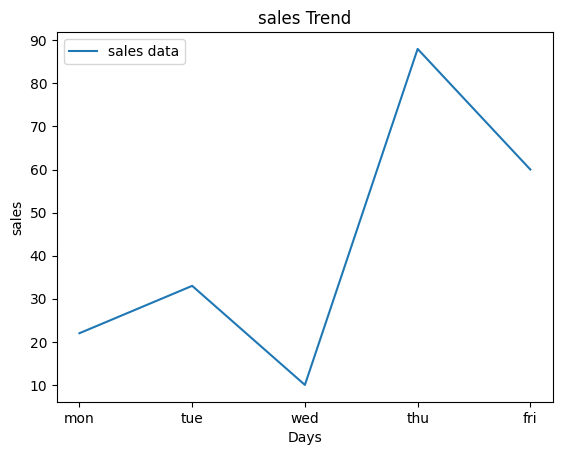

In [246]:
#line chart
x=[22,33,10,88,60]
y=['mon','tue','wed','thu','fri']
plt.plot(y,x,label="sales data")
plt.ylabel("sales")
plt.xlabel("Days")
plt.title("sales Trend")
plt.legend()
plt.show()

# DATA VISUALIZATION WITH MATPLOTLIB AND SEABORN

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns


In [248]:
#importing dataset
df=sns.load_dataset("tips")

In [249]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Users\Valued Customer\AppData\Local\Temp\ipykernel_4292\867111645.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


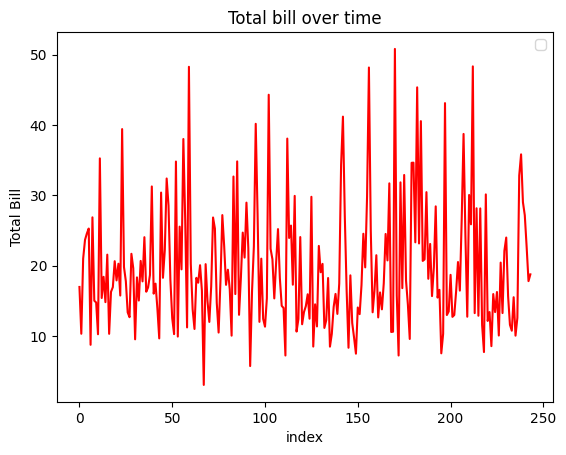

In [250]:
plt.plot(df['total_bill'],color='red')
plt.title('Total bill over time')
plt.xlabel('index')
plt.ylabel('Total Bill')
plt.legend()
plt.show()

### SCATTER PLOT

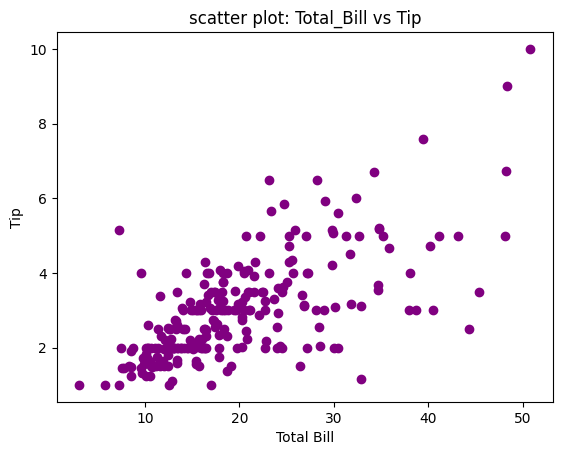

In [251]:
plt.scatter(df["total_bill"],df["tip"],color='purple',)
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("scatter plot: Total_Bill vs Tip")
plt.show()

# BAR CHART

C:\Users\Valued Customer\AppData\Local\Temp\ipykernel_4292\2977329994.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day',y="tip",data=df,palette="viridis")


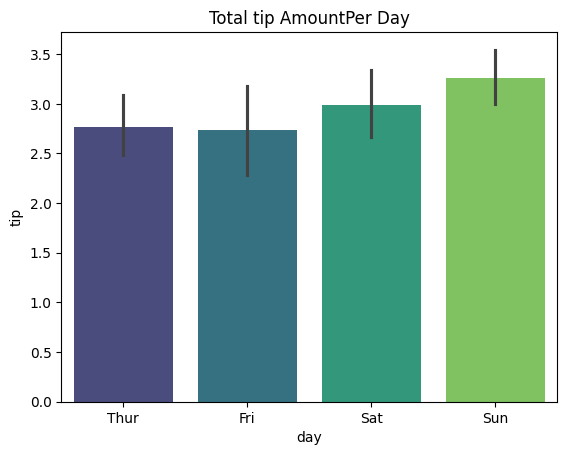

In [252]:
sns.barplot(x='day',y="tip",data=df,palette="viridis")
plt.title("Total tip AmountPer Day")
plt.show()

## PIE CHART

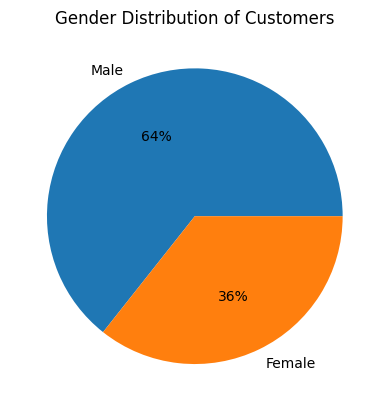

In [253]:
df['sex'].value_counts().plot(kind="pie",autopct="%1.0f%%")
plt.title("Gender Distribution of Customers")
plt.ylabel("")
plt.show()